### Plot the fraction of SIR during the dynamic

In [16]:
import csv
import configparser
import numpy

import matplotlib.pyplot as plt
import networkx as nx

from operator import itemgetter
from os import listdir
from os.path import isfile, isdir, join, exists

In [17]:
plt.rcParams['figure.figsize'] = [10,5]

In [18]:
EmailURV = '../../src/datasets/EmailURV/EmailURV.csv'
Emailcontacts = '../../src/datasets/Emailcontacts/Emailcontacts.csv'

G = nx.Graph()
with open(EmailURV, 'r') as file:
    reader = csv.reader(file, delimiter=",")
    for row in reader:
        G.add_edge(int(row[0]), int(row[1]))
N_AGENTS = len(G.nodes())
N_USERS = N_AGENTS

In [19]:
N_USERS

1133

In [53]:
time = 50

In [57]:
mypath = '../../log/URV-test-powerlaw/'
dirs = [f for f in listdir(mypath) if isdir(join(mypath, f))]
memlogs = [join(join(mypath, f), 'memoryLog.csv') for f in dirs]
memlogs

['../../log/URV-test-powerlaw/2019_18_03_23_41_28/memoryLog.csv',
 '../../log/URV-test-powerlaw/2019_18_03_23_41_42/memoryLog.csv',
 '../../log/URV-test-powerlaw/2019_18_03_23_41_31/memoryLog.csv',
 '../../log/URV-test-powerlaw/2019_18_03_23_41_38/memoryLog.csv',
 '../../log/URV-test-powerlaw/2019_18_03_23_41_35/memoryLog.csv']

### Compute and plot the fraction of S, I, R during the dynamics

0.0 % fails


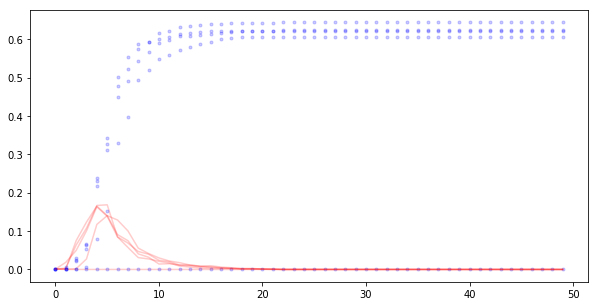

In [58]:
counter = 0
timelist = []
fail = 0
for file in memlogs:
    time_SIR_frac = [[0,0,0]]*(time + 1)
    time_SIR_frac = numpy.array(time_SIR_frac)
    SIR_dict = {'s' : 0, 'i':1, 'r': 2}

    with open(file, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        for row in spamreader:
            if '#' in row[0]: continue
            if 'agent' in row: continue
            try:
                time_SIR_frac[int(float(row[1]))][SIR_dict[row[3]]] +=1
            except IndexError as e:
                print(e)
                print(row)
                break

        #list_of_tup.append((int(row[0]), int(row[1]), row[2], int(row[3])))
        #listup = [e[3] for e in [element for element in list_of_tup if element[2] == 'u']]
        #listdown = [e[3] for e in [element for element in list_of_tup if element[2] == 'd']]

        x = time_SIR_frac[1:] / N_USERS 
        t = range(time)
        try:
            timelist.append( numpy.min(
                numpy.where(
                    numpy.array([e[1] for e in x]) == 0.
                )[0]
            ))
        except:
            fail+=1
        
        #if all(i >= 0.99 for i in [e[0] for e in x]) :
        #    counter += 1
        #    print("lost graphs:", counter/len(memlogs), "%")
        #    continue
        #plt.figure()
        #plt.plot(t, [e[0] for e in x], 'g--', alpha=0.2) # S
        plt.plot(t, [e[1] for e in x], 'r-', alpha=0.2) # I
        plt.plot(t, [e[2] for e in x], 'b.', alpha=0.2) # R
        plt.show
print(fail/len(memlogs)*100,"% fails")

### Distribution of the time at which all nodes are S or R

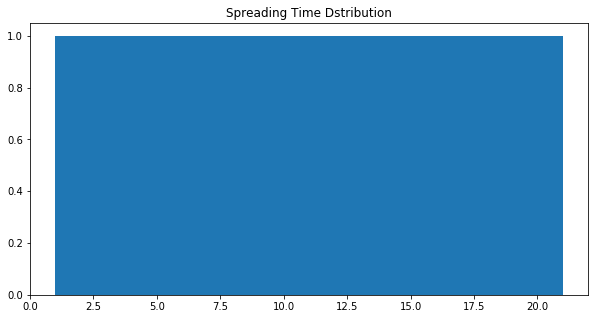

min:	1
max:	21
1.5max:	31.5
10max:	210
avg:	12
2avg:	23
10avg:	111


In [56]:
plt.hist(timelist, bins='auto')  # arguments are passed to np.histogram
plt.title("Spreading Time Dstribution")
plt.show()

print("min:", min(timelist), sep='\t')
print("max:", max(timelist), sep='\t')
print("1.5max:", max(timelist)*1.5, sep='\t')
print("10max:", max(timelist)*10, sep='\t')
print("avg:", int(numpy.mean(timelist))+1, sep='\t')
print("2avg:", int(numpy.mean(timelist)*2)+1, sep='\t')
print("10avg:", int(numpy.mean(timelist)*10)+1, sep='\t')